# Chương 8: Machine Learning
Chương này yêu cầu bạn thực hiện bài toán sentiment analysis trên corpus sentence polarity dataset v1.0 trong Moview Review Data của tác giả Bo Pang và Lillian Lee. Yêu cầu của bài toán sentiment analysis là phân loại các câu thành positive và negative sentiments.

# 70. Download và tiền xử lý dữ liệu
Sử dụng dữ liệu liên quan đến sentiment polarity của các câu (download tại đây), tạo dữ liệu chuẩn hoá (sentiment.txt) theo hướng dẫn dưới đây.

1. Thêm vào '+1' ở bắt đầu các dòng trong file rt-polarity.pos (giữa +1 và nội dung của câu cách nhau bởi ký tự trắng).

2. Thêm vào '-1' ở bắt đầu các dòng trong file rt-polarity.neg (giữa -1 và nội dung của câu cách nhau bởi ký tự trắng).

3. Kết hợp nội dung thu được trong phần 1 và 2 để tạo thành file sentiment.txt

Sau khi đã thu được file sentiment.txt, xác nhận số lượng các câu với positive polarity và các câu với negative polarity.

In [0]:
# Read files
with open('rt-polaritydata/rt-polaritydata/rt-polarity.pos', 'r', encoding='latin-1') as f:
    pos = f.readlines()
    
with open('rt-polaritydata/rt-polaritydata/rt-polarity.neg', 'r', encoding='latin-1') as f:
    neg = f.readlines()

In [0]:
# Create sentiment.txt
with open('sentiment.txt', 'w') as f:
    for line in pos:
        f.write('+1 ' + line)
    
    for line in neg:
        f.write('-1 ' + line)

In [0]:
# Check sentiment.txt
with open('sentiment.txt', 'r') as f:
    sentiment_data = f.readlines()
    
print(len(sentiment_data))
print('Pos sentence: ' + sentiment_data[0])
print('Neg sentence: ' + sentiment_data[-1])

10662
Pos sentence: +1 the rock is destined to be the 21st century's new " conan " and that he's going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal . 

Neg sentence: -1 enigma is well-made , but it's just too dry and too placid . 



# 71. Stopwords
Tạo ra danh sách các stopwords trong tiếng Anh. Sau đó viết 1 hàm để kiểm tra một từ có thuộc danh sách stopwords hay không. Hàm sẽ trả về giá trị TRUE nếu từ cho trước thuộc danh sách stopwords. Ngược lại hàm sẽ trả về giá trị FALSE. Sau đó viết mô tả về các test cho hàm đã viết.

In [0]:
def is_stopword(word):
    """
    The function is used to check if a word is stopword
    
    Parameters
    ----------
    word : str
        Word that we want to check, e.g., ``he`` or ``eat``.
    
    Returns
    -------
    out : bool
        True if word in stopwords list.
        False if word not in stopwords list.
        
    Examples
    --------
    >>> is_stopword('eat')
    False
    
    >>> is_stopword('both')
    True
    
    >>> is_stopword(1.5)
    False
    
    >>> s = (2,2)
    >>> is_stopword(s)
    False
    """
    
    # Return False if word is not str
    if not isinstance(word, str):
        return False
    
    stopwords = {"both", "only", "wouldn", "against", "their", "now", "didn", "himself", "ma", "yours", "having", "me", "doesn", "needn", "most", "itself", "m", "s", "isn't", "shan", "did", "won't", "don", "mightn't", "where", "but", "when", "wasn't", "wouldn't", "who", "those", "more", "with", "and", "whom", "an", "into", "before", "you've", "it", "ve", "ain", "haven", "o", "some", "are", "doesn't", "few", "she", "then", "can", "will", "each", "myself", "than", "has", "they", "it's", "there", "hasn", "which", "until", "or", "out", "re", "on", "had", "your", "am", "have", "in", "under", "should", "been", "because", "ourselves", "shouldn't", "that", "too", "the", "from", "didn't", "you'll", "you", "haven't", "don't", "mustn", "hadn", "own", "during", "does", "his", "needn't", "by", "doing", "mustn't", "wasn", "ll", "theirs", "other", "you're", "if", "my", "over", "hasn't", "further", "above", "down", "again", "why", "how", "i", "its", "them", "weren't", "do", "themselves", "between", "through", "here", "weren", "this", "won", "isn", "all", "him", "while", "for", "yourselves", "were", "to", "you'd", "shouldn", "below", "very", "couldn", "about", "she's", "off", "her", "we", "d", "aren't", "just", "what", "yourself", "any", "shan't", "was", "be", "nor", "t", "y", "so", "hadn't", "a", "is", "couldn't", "that'll", "our", "after", "as", "he", "hers", "such", "once", "aren", "these", "herself", "of", "up", "same", "being", "mightn", "ours", "at", "not", "no", "should've"}
    
    return word in stopwords

In [0]:
is_stopword('eat')

False

In [0]:
is_stopword('both')

True

In [0]:
is_stopword(1.5)

False

In [0]:
s = (2,2)
is_stopword(s)

False

# 72. Trích xuất đặc trưng
Tự thiết kế các đặc trưng cho bài toán sentiment analysis. Sau đó trích xuất đặc trưng từ dữ liệu training.

Hint: phương pháp trích xuất đặc trưng đơn giản nhất là sử dụng từ gốc (stem) các từ không trong danh sách các stopwords. Phương pháp này có thể sử dụng để làm hệ thống baseline.

## Read data

In [0]:
import pandas as pd
import random

In [0]:
with open('sentiment.txt', 'r') as f:
    lines = f.readlines()
    
random.shuffle(lines)
    
label = [1 if s.split(' ', 1)[0] == '+1' else 0 for s in lines]
text = [s.strip().split(' ', 1)[1] for s in lines]

data_df = pd.DataFrame(list(zip(text, label)), columns=['comment', 'label'])

data_df.head()

,comment,label
0,it's absolutely amazing how first-time directo...,0
1,"if you like quirky , odd movies and/or the iro...",1
2,the modern-day characters are nowhere near as ...,0
3,a metaphor for a modern-day urban china search...,1
4,"a photographic marvel of sorts , and it's cert...",1


## Simple preprocess

In [0]:
from gensim.utils import simple_preprocess

data_df['simple_preprocessed_comment'] = [simple_preprocess(comment, deacc=True) for comment in data_df['comment']]

In [0]:
data_df.head()

,comment,label,simple_preprocessed_comment
0,it's absolutely amazing how first-time directo...,0,"[it, absolutely, amazing, how, first, time, di..."
1,"if you like quirky , odd movies and/or the iro...",1,"[if, you, like, quirky, odd, movies, and, or, ..."
2,the modern-day characters are nowhere near as ...,0,"[the, modern, day, characters, are, nowhere, n..."
3,a metaphor for a modern-day urban china search...,1,"[metaphor, for, modern, day, urban, china, sea..."
4,"a photographic marvel of sorts , and it's cert...",1,"[photographic, marvel, of, sorts, and, it, cer..."


## Remove stopword

In [0]:
data_df['rmstopword_comment'] = [[word for word in list_tokens if is_stopword(word) == False] for list_tokens in data_df['simple_preprocessed_comment']]

data_df.head()['rmstopword_comment']

0    [absolutely, amazing, first, time, director, k...
1        [like, quirky, odd, movies, ironic, fun, one]
2    [modern, day, characters, nowhere, near, vivid...
3    [metaphor, modern, day, urban, china, searchin...
4    [photographic, marvel, sorts, certainly, inval...
Name: rmstopword_comment, dtype: object

## Stemming

In [0]:
from nltk.stem.porter import PorterStemmer
poster = PorterStemmer()

data_df['rmstopword_stemming_comment'] = [[poster.stem(word) for word in list_tokens] for list_tokens in data_df['rmstopword_comment']]

data_df.head()['rmstopword_stemming_comment']

0    [absolut, amaz, first, time, director, kevin, ...
1            [like, quirki, odd, movi, iron, fun, one]
2    [modern, day, charact, nowher, near, vivid, th...
3    [metaphor, modern, day, urban, china, search, ...
4    [photograph, marvel, sort, certainli, invalu, ...
Name: rmstopword_stemming_comment, dtype: object

In [0]:
X = data_df['rmstopword_comment'].apply(lambda x: ' '.join(x))
y = data_df['label']

## CountVectorizer

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(min_df=2, ngram_range=(1, 1))

X_train_count_vect = count_vect.fit(X).transform(X) 

In [86]:
# Print score of sentence 0
feature_names = count_vect.get_feature_names()

feature_index = X_train_count_vect[0,:].nonzero()[1]
count_scores = zip(feature_index, [X_train_count_vect[0, x] for x in feature_index])

for w, s in [(feature_names[i], s) for (i, s) in count_scores]:
    print(w, s)

absolutely 1
action 1
add 1
amazing 1
boring 1
canon 1
chan 2
director 1
donovan 1
find 1
first 1
kevin 1
make 1
managed 1
new 1
sequences 1
something 1
time 1


## TfidfVectorizer

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
X_train_tfidf_vect = tfidf_vect.fit_transform(X)

In [88]:
# Print score of sentence 0
feature_names = tfidf_vect.get_feature_names()

feature_index = X_train_tfidf_vect[0,:].nonzero()[1]
tfidf_scores = zip(feature_index, [X_train_tfidf_vect[0, x] for x in feature_index])

for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
    print(w, s)

boring 0.20856300210159356
sequences 0.2287342850625559
action 0.1666146371036295
make 0.1550033421234437
chan 0.4878690280002895
canon 0.2822939450407057
add 0.22556250640409523
new 0.1642957947128529
something 0.16627331628766237
find 0.18736268472382375
managed 0.2652944407382041
donovan 0.27716404351846435
kevin 0.24573378936505752
director 0.15069603779625476
time 0.14558132846228347
first 0.1700447235621647
amazing 0.2406038878428162
absolutely 0.23616016501876405


# 73. Training
Training model bằng phương pháp logistics regressions sử dụng các đặc trưng tạo ra trong bài 72.

In [0]:
from sklearn.linear_model import LogisticRegression

## Train with countvectorize feature

In [95]:
clf_count = LogisticRegression(random_state=0).fit(X_train_count_vect, y)
clf_count.score(X_train_count_vect, y)

0.9501969611705121

## Train with tfidfvectorize feature

In [96]:
clf_tfidf = LogisticRegression(random_state=0).fit(X_train_tfidf_vect, y)
clf_tfidf.score(X_train_tfidf_vect, y)

0.9030200712811856

# 74. Prediction
Sử dụng mô hình logistics regressions đã huấn luyện trong bài 73, hãy viết chương trình dự đoán polarity cho một câu đầu vào và tính xác suất cho các nhãn (+1, -1).

In [0]:
def predict_sentiment(comment):
    """
    Return the prob of possible labels of the input comment base on cls_tfidf model
    
    Parameters
    ----------
    comment : str
        The input comment that we want to get label, e.g., `It's so bad`, `It's very good.`
    
    Returns
    -------
    out : numpy.ndarray 
        The prob of possible labels
    """

    # Simple preprocess: remove punctuation, tokenize
    comment = simple_preprocess(comment, deacc=True)

    # Remove stopword
    comment = [word for word in comment if is_stopword(word) == False]

    # Convert to feature vector
    comment_vect = tfidf_vect.transform(comment)

    return clf_tfidf.predict_proba(comment_vect)

In [98]:
predict_sentiment("It's so bad")
# The result shows that the comment's label is 0 --> negative 

array([[0.97353255, 0.02646745]])

# 75. Trọng số của các features (Feature weights)
Trong mô hình logistics regression đã huấn luyện trong bài 73, đưa ra top 10 các features có trọng số cao nhất và top 10 các features có trọng số thấp nhất.

## Top 10 có trọng số cao nhất

In [0]:
import numpy as np

In [0]:
top_10_max_indices = np.array(clf_tfidf.coef_[0]).argsort()[-10:][::-1]

In [101]:
np.array(tfidf_vect.get_feature_names())[top_10_max_indices]

array(['performances', 'entertaining', 'enjoyable', 'best', 'heart',
       'still', 'fun', 'powerful', 'solid', 'cinema'], dtype='<U15')

## Top 10 có trọng số thấp nhất

In [0]:
top_10_min_indices = np.array(clf_tfidf.coef_[0]).argsort()[:10]

In [103]:
np.array(tfidf_vect.get_feature_names())[top_10_min_indices]

array(['bad', 'dull', 'boring', 'worst', 'neither', 'fails', 'feels',
       'nothing', 'tv', 'flat'], dtype='<U15')

# 76. Dự đoán trên dữ liệu training
Sử dụng mô hình đã học trong bài 73 để đưa ra dự đoán trên dữ liệu training. Đưa ra nhãn gốc, nhãn dự đoán, và xác suất của nhãn dự đoán cho mỗi câu trong dữ liệu (cách nhau bởi ký tự tab).

In [0]:
predict_labels = clf_tfidf.predict(X_train_tfidf_vect)
prob_labels = clf_tfidf.predict_proba(X_train_tfidf_vect)

In [105]:
for l, pl, probl in zip(y[:10], predict_labels[:10], prob_labels[:10]):
    print('{}\t{}\t{}'.format(l, pl, probl[pl]))

0	0	0.7682821547827502
1	1	0.6560727381478195
0	1	0.5458134738264041
1	1	0.755295543227704
1	1	0.6925821913525558
0	0	0.7310788094993885
0	0	0.6600482753098564
1	1	0.6051838266322799
1	0	0.5019497114141189
1	1	0.7447164543502106


# 77. Tính độ chính xác của mô hình
Sử dụng đầu ra của bài 76, tính accuracy cho toàn bộ dữ liệu; precision, recall, F1 cho nhãn +1.

## TP, FP, TN, FN

In [0]:
TP = 0
FP = 0
TN = 0
FN = 0

for l, pl in zip(y, predict_labels):
    if pl == 1 and l == 1:
        TP += 1
    elif pl == 1 and l == 0:
        FP += 1
    elif pl == 0 and l == 0:
        TN += 1
    elif pl == 0 and l == 1:
        FN += 1

## Accuracy

$$Acc = \frac{Number\ of\ correct\ predictions}{Number\ of\ predictions} = \frac{TP + TN}{TP + FP + TN + FN}$$

In [109]:
acc = (TP + TN)/(TP + FP + TN + FN)
acc # == clf_tfidf.score(X_train_tfidf_vect, y_train)

0.9030200712811856

## Precision

$$Precision = \frac{TP}{TP + FP}$$

In [110]:
precision = TP/(TP + FP)
precision

0.9079172204290867

## Recall

$$Recall = \frac{TP}{TP+FN}$$

In [111]:
recall = TP/(TP + FN)
recall

0.8970174451322454

## F1

$$F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}$$

In [112]:
f1 = (2 * precision * recall)/(precision + recall)
f1

0.9024344215889791

# 78. 5-fold cross validation
Vì các thực nghiệm trong bài 76, 77 đánh giá model trên dữ liệu huấn luyện nên khó có thể nói đó là các đánh giá hợp lý. Các đánh giá này chỉ đánh giá khả năng mô hình "fit" với dữ liệu training chứ không đánh giá khả năng khái quát (generalization) của mô hình. Vì thế bài tập 78 yêu cầu bạn đánh giá mô hình sử dụng 5-fold cross validation. Đưa ra accuracy, precision, recall, F1 score cho 5-fold cross validation (tính trung bình của 5 folds).

In [0]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

In [116]:
metric_dict = {'acc_avg': 0, 'precision_avg': 0, 'recall_avg': 0, 'f1_avg': 0}

for train_index, test_index in kf.split(X_train_tfidf_vect):
    X_train_kfold, X_test_kfold = X_train_tfidf_vect[train_index], X_train_tfidf_vect[test_index]
    y_train_kfold, y_test_kfold = y[train_index], y[test_index]

    clf_tfidf_kfold = LogisticRegression(random_state=0).fit(X_train_kfold, y_train_kfold)

    predict_labels_kfold = clf_tfidf.predict(X_test_kfold)

    # Calc TP, FP, TN, FN
    TP, FP, TN, FN = 0, 0, 0, 0

    for l, pl in zip(y_test_kfold, predict_labels_kfold):
        if pl == 1 and l == 1:
            TP += 1
        elif pl == 1 and l == 0:
            FP += 1
        elif pl == 0 and l == 0:
            TN += 1
        elif pl == 0 and l == 1:
            FN += 1

    metric_dict['acc_avg'] += ((TP + TN)/(TP + FP + TN + FN))/5

    precision = TP/(TP + FP)
    metric_dict['precision_avg'] += precision/5

    recall = TP/(TP + FN)
    metric_dict['recall_avg'] += recall/5

    metric_dict['f1_avg'] += ((2 * precision * recall)/(precision + recall))/5


print('Average accuracy of 5-fold', metric_dict['acc_avg'])
print('Average precision of 5-fold', metric_dict['precision_avg'])
print('Average recall of 5-fold', metric_dict['recall_avg'])
print('Average F1 of 5-fold', metric_dict['f1_avg'])

Average accuracy of 5-fold 0.9030190722225301
Average precision of 5-fold 0.9081078846024377
Average recall of 5-fold 0.8970179457435152
Average F1 of 5-fold 0.9025116534522175


# 79. Vẽ đồ thị precision-recall
Vẽ đồ thị precision-recall theo sự thay đổi của giá trị threshold trong mô hình logistic regression.

(0.0, 1.0)

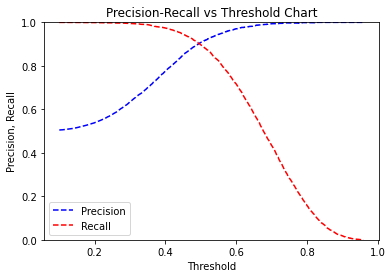

In [119]:
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Fit model
clf_tfidf = LogisticRegression(random_state=0).fit(X_train_tfidf_vect, y)

# Get predictions
pred_y = clf_tfidf.predict(X_train_tfidf_vect) 
probs_y = clf_tfidf.predict_proba(X_train_tfidf_vect)

precision, recall, thresholds = precision_recall_curve(y, probs_y[:, 1]) 
pr_auc = metrics.auc(recall, precision)

# Plot
plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])